## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5) # python>=3.5
import sklearn
assert sklearn.__version__ >= "0.20" # sklearn >= 0.20

import numpy as np #numerical package in python
import os
%matplotlib inline
import matplotlib.pyplot as plt #plotting package

# to make this notebook's output identical at every run
np.random.seed(42)

#matplotlib magic for inline figures
%matplotlib inline 
import matplotlib # plotting library
import matplotlib.pyplot as plt

# Where to save the figures
ROOT_DIR = "."
IMAGES_PATH = os.path.join(ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    '''
        plt.savefig wrapper. refer to 
        https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
        
        Args:
            fig_name (str): name of the figrue
            tight_layout (bool): adjust subplot to fit in the figure area
            fig_extension (str): file format to save the figure in
            resolution (int): figure resolution
    '''
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
import os
import tarfile
import urllib
DATASET_PATH = os.path.join("datasets", "housing")

In [3]:
import pandas as pd

def load_housing_data(housing_path):
    '''
        loads housing.csv dataset stored
        
        Args:
            housing_path (str): path to folder containing housing datased
        
        Returns:
            pd.DataFrame
    '''
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
pd.DataFrame

pandas.core.frame.DataFrame

In [5]:
housing = load_housing_data(DATASET_PATH)
housing.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# to see a concise summary of data types, null values, and counts
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].head()

0    NEAR BAY
1    NEAR BAY
2    NEAR BAY
3    NEAR BAY
4    NEAR BAY
Name: ocean_proximity, dtype: object

In [8]:
housing.iloc[1]

longitude              -122.22
latitude                 37.86
housing_median_age          21
total_rooms               7099
total_bedrooms            1106
population                2401
households                1138
median_income           8.3014
median_house_value      358500
ocean_proximity       NEAR BAY
Name: 1, dtype: object

In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Visualizing the data 

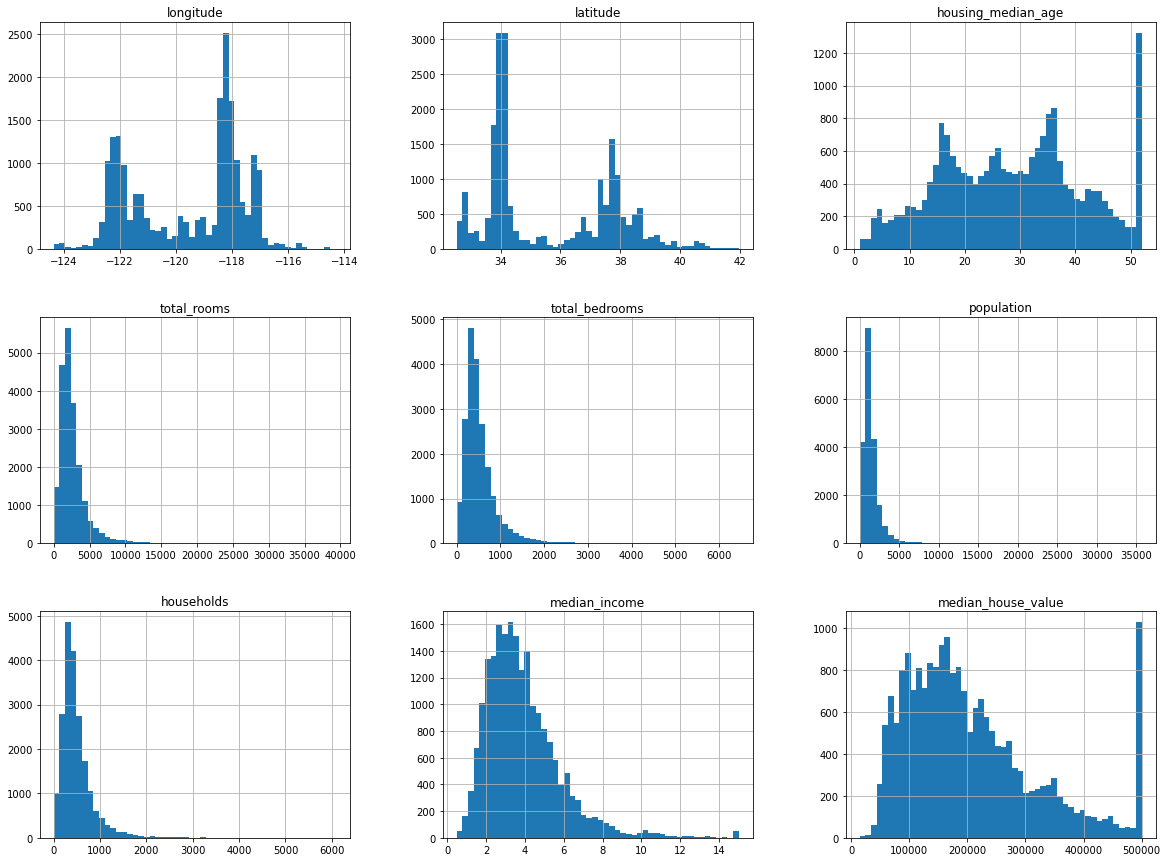

In [11]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

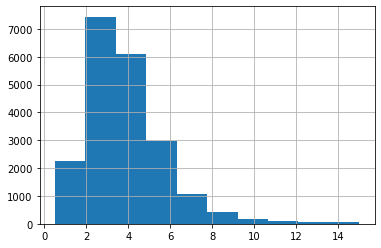

In [12]:
housing["median_income"].hist()
plt.show()

In [13]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

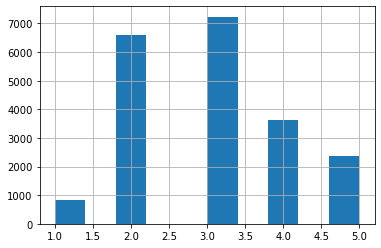

In [14]:
housing["income_cat"].hist()

#### Visualizing the household incomes based on latitude & longitude coordinates

Saving figure bad_visualization_plot


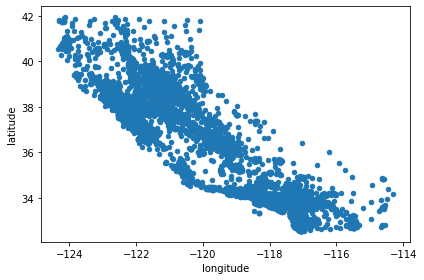

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


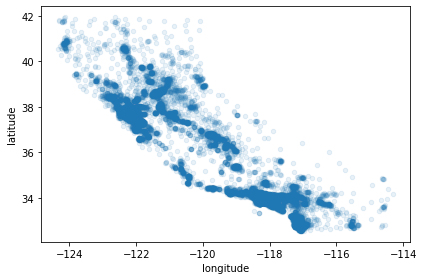

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

<ipython-input-17-30a6f1a2327a>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


Saving figure california_housing_prices_plot


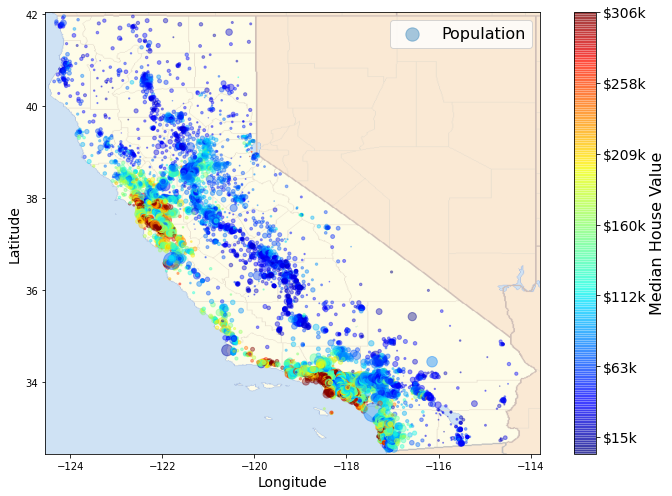

In [17]:
images_path = os.path.join('./', "images")
os.makedirs(images_path, exist_ok=True)
filename = "california.png"

import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# setting up heatmap colors based on median_house_value feature
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cb = plt.colorbar()
cb.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cb.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

In [18]:
corr_matrix = housing.corr()

In [19]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


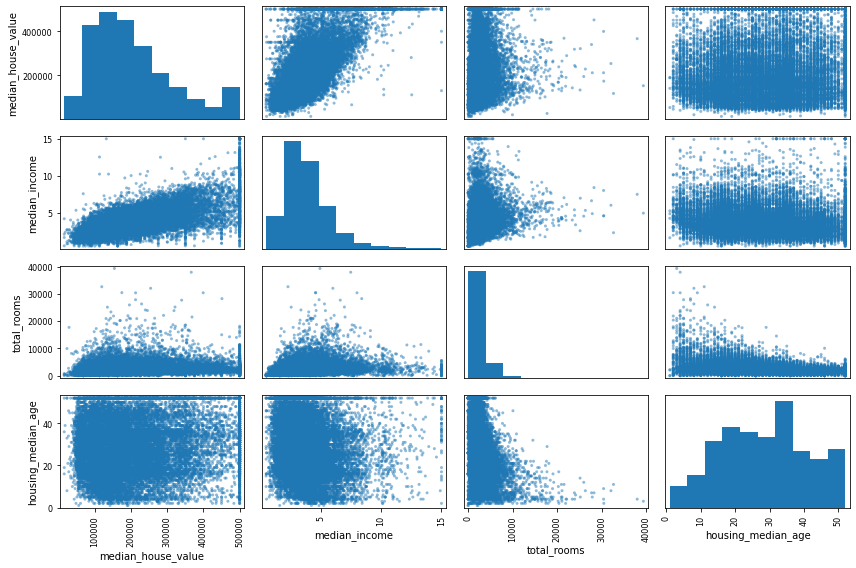

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


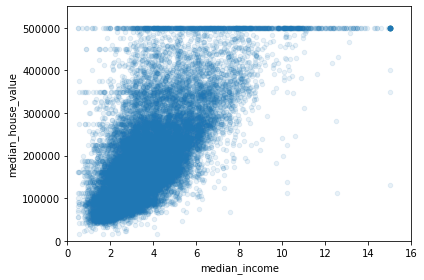

In [21]:
# median income vs median house vlue plot plot 2 in the first row of top figure
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

### Augmenting Features

In [22]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [23]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

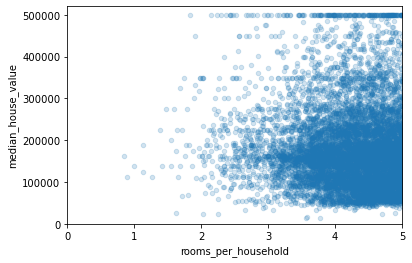

In [24]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

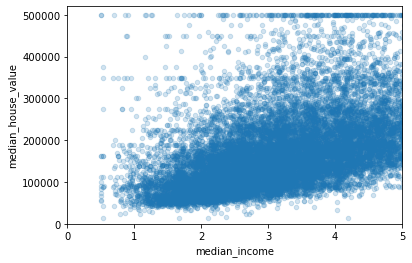

In [25]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [26]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Preprocessing

In [27]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,3,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,2,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,4,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,3,4.633540,NaN,2.403727


In [28]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household


In [29]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY,3,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY,2,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY,4,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY,3,4.633540,NaN,2.403727


In [30]:
median = housing["total_bedrooms"].median() 
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY,3,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY,2,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY,4,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY,3,4.633540,NaN,2.403727


### Prepare Data

In [31]:
housing_features = housing.drop("median_house_value", axis=1)
housing_labels = housing["median_house_value"].copy()

In [32]:
housing_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3,6.281853,0.172096,2.181467


In [33]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin


imputer = SimpleImputer(strategy="median") # use median imputation for missing values
housing_num = housing_features.drop("ocean_proximity", axis=1) # remove the categorical feature
# column index
rooms_idx, bedrooms_idx, population_idx, households_idx = 3, 4, 5, 6

# 
class AugmentFeatures(BaseEstimator, TransformerMixin):
    '''
    implements the previous features we had defined
    housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
    housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
    housing["population_per_household"]=housing["population"]/housing["households"]
    '''
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_idx] / X[:, households_idx]
        population_per_household = X[:, population_idx] / X[:, households_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = AugmentFeatures(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values) 

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', AugmentFeatures()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

numerical_features = list(housing_num)
categorical_features = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ])

housing_prepared = full_pipeline.fit_transform(housing_features)

### Splitting dataset

In [34]:
from sklearn.model_selection import train_test_split
data_target = housing['median_house_value']
train, test, target, target_test = train_test_split(housing_prepared, data_target, test_size=0.3, random_state=0)

### Select a model and train

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train, target)

# let's try the full preprocessing pipeline on a few training instances
data = test
labels = target_test

print("Predictions:", lin_reg.predict(data)[:5])
print("Actual labels:", list(labels)[:5])

Predictions: [207828.06448011 281099.80175494 176021.36890539  93643.46744928
 304674.47047758]
Actual labels: [136900.0, 241300.0, 200700.0, 72500.0, 460000.0]


In [36]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(test)
mse = mean_squared_error(target_test, preds)
rmse = np.sqrt(mse)
rmse

67879.86844243006

In [37]:
import os
import tarfile
import urllib
DATASET_PATH2 = os.path.join("datasets", "airbnb")

In [38]:
def load_airbnb_data(airbnb_path): 
    csv_path = os.path.join(airbnb_path, "AB_NYC_2019.csv")
    return pd.read_csv(csv_path)

In [39]:
airbnb = load_airbnb_data(DATASET_PATH2)
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [40]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [41]:
airbnb_drop = airbnb.drop(['name', 'host_id', 'host_name', 'last_review'], axis = 1)
airbnb = airbnb.drop(['name', 'host_id', 'host_name', 'last_review'], axis = 1)

In [42]:
airbnb.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


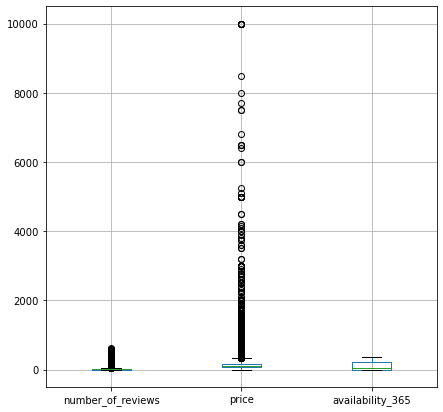

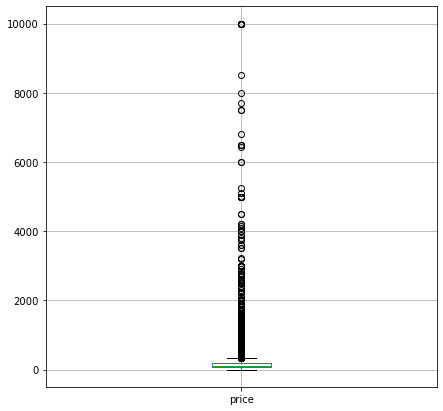

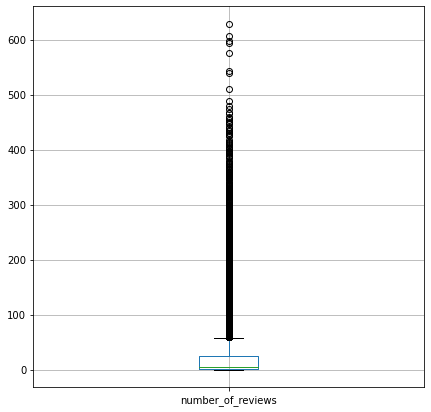

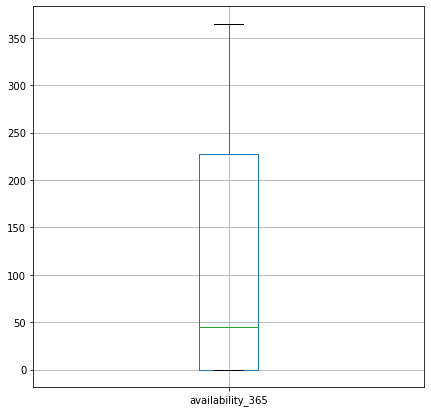

In [43]:
airbnb.boxplot(column = ['number_of_reviews', 'price', 'availability_365'],figsize=(7,7))
plt.show()
airbnb.boxplot(column = 'price', figsize = (7,7))
plt.show()
airbnb.boxplot(column = 'number_of_reviews', figsize = (7,7))
plt.show()
airbnb.boxplot(column = 'availability_365', figsize = (7,7))
plt.show()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

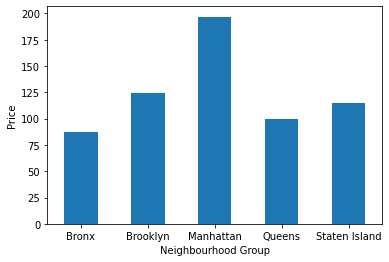

In [44]:
avg_price = airbnb.groupby(['neighbourhood_group'])['price'].mean()
bar = avg_price.plot.bar(rot = 0)
bar.set_ylabel("Price")
bar.set_xlabel("Neighbourhood Group")
avg_price

array([[<AxesSubplot:title={'center':'Bronx'}>,
        <AxesSubplot:title={'center':'Brooklyn'}>],
       [<AxesSubplot:title={'center':'Manhattan'}>,
        <AxesSubplot:title={'center':'Queens'}>],
       [<AxesSubplot:title={'center':'Staten Island'}>, <AxesSubplot:>]],
      dtype=object)

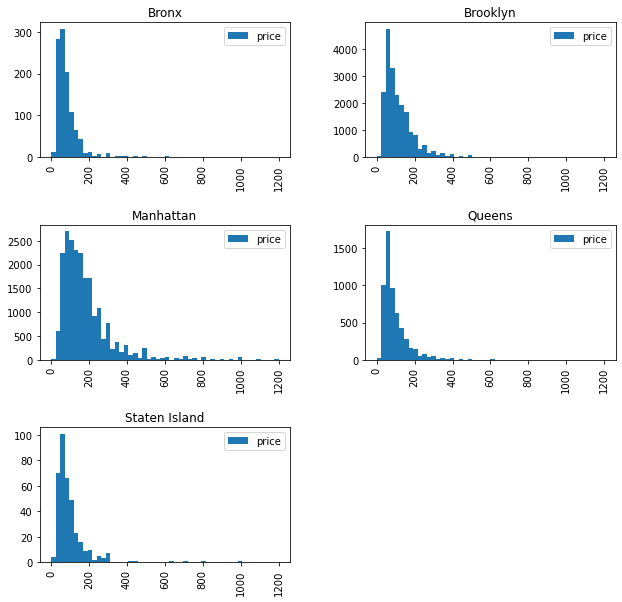

In [45]:
airbnb.hist(column='price', by='neighbourhood_group', legend='true', bins=50, figsize= (10,10), range=(0, 1200))

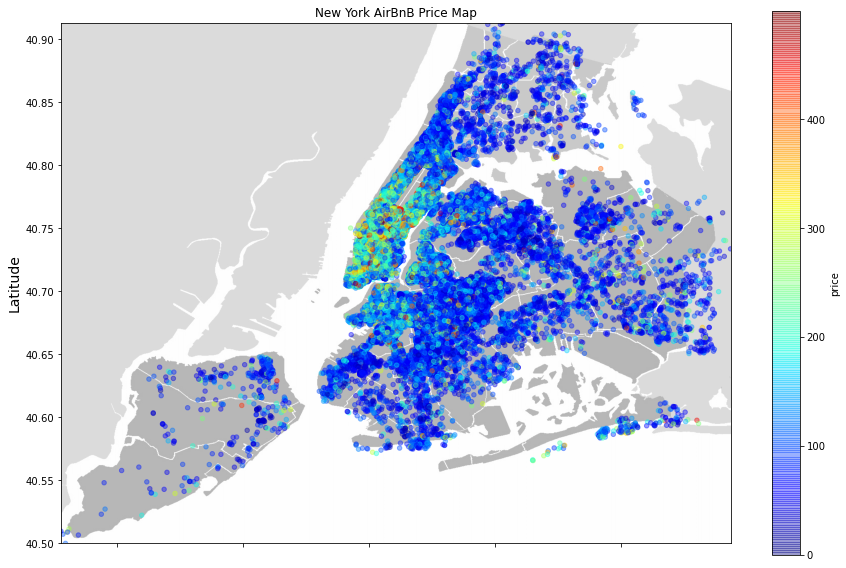

In [46]:
images_path2 = os.path.join('./', "images")
os.makedirs(images_path2, exist_ok=True)
filename2 = "newyork.png"

airbnb_subset = airbnb[airbnb.price < 500]

import matplotlib.image as mpimg
newyork_img=mpimg.imread(os.path.join(images_path2, filename2))

ax = airbnb_subset.plot(kind="scatter", x="longitude", y="latitude",figsize = (15,10),
                        c="price", cmap=plt.get_cmap("jet"),
                        colorbar=True, alpha=0.4)

extent_coord = [airbnb_subset['longitude'].min(), airbnb_subset['longitude'].max(), airbnb_subset['latitude'].min()
               , airbnb_subset['latitude'].max()]

plt.imshow(newyork_img, extent = extent_coord, alpha = 0.5, cmap = plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize = 14)
plt.xlabel("Longitude", fontsize = 14) 
plt.title("New York AirBnB Price Map")

plt.show()

<BarContainer object of 3 artists>

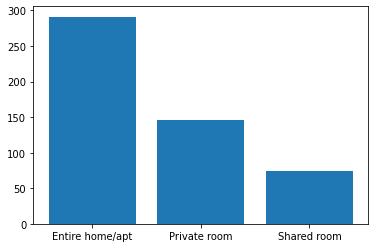

In [47]:
airbnb_180 = airbnb.loc[(airbnb['availability_365'] > 180) & (airbnb['neighbourhood_group'] == "Manhattan")]
airbnb_180 = airbnb_180.groupby('room_type').mean()['price']
plt.bar(['Entire home/apt', 'Private room', 'Shared room'], airbnb_180)

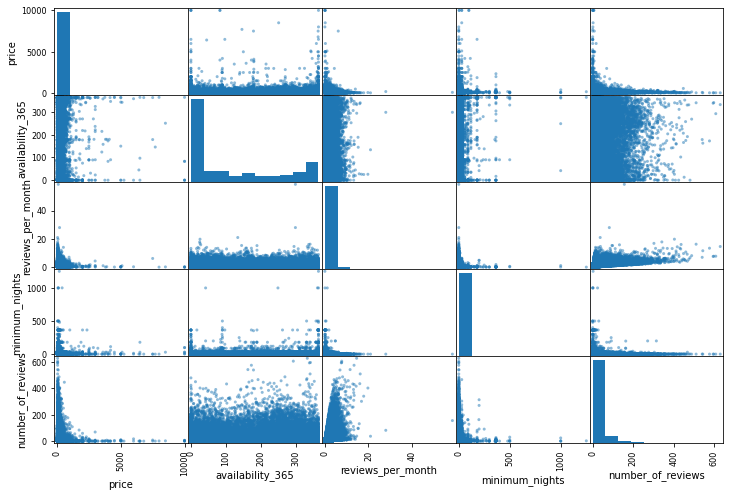

In [48]:
corr_matrix = airbnb.corr()

from pandas.plotting import scatter_matrix 
attributes = ['price', 'availability_365', 'reviews_per_month', 'minimum_nights', 'number_of_reviews']
scatter_matrix(airbnb[attributes], figsize=(12,8))
plt.show()

In [49]:
corr_matrix

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
latitude,-0.003125,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [50]:
corr_matrix['price'].sort_values(ascending=False)

price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
id                                0.010619
reviews_per_month                -0.030608
number_of_reviews                -0.047954
longitude                        -0.150019
Name: price, dtype: float64

From the corr_matrix table

Positive correlations (Top 3): 
- number_of_reviews and reviews_per_month
- availability_365 and calculated_host_listings_count
- id and reviews_per_month


Negative correlations (Top 3): 
- id and number_of_reviews
- calculated_host_listings_count and longitude
- longitude and price



In [51]:
airbnb["nights_per_review_monthly"] = airbnb["minimum_nights"]/airbnb["reviews_per_month"]
airbnb["reviews_per_host_listings"] = airbnb["number_of_reviews"]/airbnb["calculated_host_listings_count"]

In [52]:
incomplete = airbnb[airbnb.isnull().any(axis=1)].head()
incomplete

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,nights_per_review_monthly,reviews_per_host_listings
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,NaN,0.0
19,7750,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,2,249,NaN,0.0
26,8700,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,1,0,NaN,0.0
36,11452,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,1,365,NaN,0.0
38,11943,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,1,365,NaN,0.0


In [53]:
median_missing = airbnb["reviews_per_month"].median() 
airbnb["reviews_per_month"].fillna(median_missing, inplace=True)
airbnb[airbnb.isnull().any(axis=1)].head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,nights_per_review_monthly,reviews_per_host_listings
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,NaN,0.0
19,7750,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,0.72,2,249,NaN,0.0
26,8700,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,0.72,1,0,NaN,0.0
36,11452,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,0.72,1,365,NaN,0.0
38,11943,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,0.72,1,365,NaN,0.0


In [54]:
airbnb["nights_per_review_monthly"] = airbnb["minimum_nights"]/airbnb["reviews_per_month"]
airbnb[airbnb.isnull().any(axis=1)].head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,nights_per_review_monthly,reviews_per_host_listings


In [55]:
airbnb['reviews_per_month'].describe()

count    48895.000000
mean         1.238930
std          1.520861
min          0.010000
25%          0.280000
50%          0.720000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64

In [56]:
airbnb_features = airbnb_drop.drop("price", axis=1) 
airbnb_labels = airbnb["price"].copy()

airbnb_features.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355
2,3647,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,NaN,1,365
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0


In [57]:
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']
numerical_columns = airbnb_features.drop(columns = categorical_features, index = 1)
categorical_columns = airbnb_features[categorical_features]
numerical_columns

,id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,40.64749,-73.97237,1,9,0.21,6,365
2,3647,40.80902,-73.94190,3,0,NaN,1,365
3,3831,40.68514,-73.95976,1,270,4.64,1,194
4,5022,40.79851,-73.94399,10,9,0.10,1,0
5,5099,40.74767,-73.97500,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...
48890,36484665,40.67853,-73.94995,2,0,NaN,2,9
48891,36485057,40.70184,-73.93317,4,0,NaN,2,36
48892,36485431,40.81475,-73.94867,10,0,NaN,1,27
48893,36485609,40.75751,-73.99112,1,0,NaN,6,2


In [58]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin


imputer = SimpleImputer(strategy="median") # use median imputation for missing values

# column index
num_reviews_idx, host_listings_idx, minimum_nights_idx, rev_month_idx = 4, 6, 3, 5

# 
class AugmentFeatures(BaseEstimator, TransformerMixin):
    def __init__(self): 
        pass
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        nights_per_review_monthly = X[:, minimum_nights_idx]/ (X[:,rev_month_idx] +1)
        reviews_per_host_listings = X[:, num_reviews_idx]/ (X[:,host_listings_idx]+1)
        
        return np.c_[X, nights_per_review_monthly, reviews_per_host_listings]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', AugmentFeatures()),
        ('std_scaler', StandardScaler()),
    ])

numerical_features = list(numerical_columns)
categorical_features = categorical_features

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ])

airbnb_prepared = full_pipeline.fit_transform(airbnb_features)

In [59]:
from sklearn.model_selection import train_test_split

train, test, target, target_test = train_test_split(airbnb_prepared, airbnb_labels, test_size=0.2, random_state=0)

In [60]:
print(train.shape)
print(test.shape)
print(target.shape)
print(target_test.shape)

(39116, 239)
(9779, 239)
(39116,)
(9779,)


In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt

lin_reg.fit(train, target)

train_preds = lin_reg.predict(train)
mse_train = mean_squared_error(target, train_preds)
print("Train MSE: ", mse_train)
print("Test RMSE: ", sqrt(mse_train))

test_preds = lin_reg.predict(test)
mse_test = mean_squared_error(target_test, test_preds)
print("Test MSE: ", mse_test)
print("Test RMSE: ", sqrt(mse_test))

Train MSE:  51644.64377839229
Test RMSE:  227.254579224253
Test MSE:  48027.660415440834
Test RMSE:  219.15213988332587
